In [2]:
# Import Necessary Packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Control Model

In [3]:
# Define the parameters of the model
# a1,a2 are the independent failure rates of bank 1 and bank 2
a1 = 0.05
a2 = 0.05

# w1,w2 are the respective cash burdens of the bank in the ecosystem
w1 = 0.5
w2 = 0.5

# Macroeconomic/Contagion constant
B = 1.0

# Federal Bailout rate (none in control)
r1 = 0
r2 = 0

# Compute a12 and a21, the conditional failure of bank a given bank b failed

# Failure rate of bank 1 given bank 2 failed
a12 = (w1 + w2 / w1) ** B * a1

# Failure rate of bank 2 given bank 1 failed 
a21 = (w1 + w2 / w2) ** B * a2

# Define the Q matrix, four states corresponding to no bank failure, bank 1 failure, bank 2 failure, both banks fail
Q = np.array([[-a1 - a2, a1, a2, 0],
              [r1, -(a21 + r1), 0, a21],
              [r2, 0, -(a12 + r2), a12],
              [ 0,0,0,0]])

In [4]:
# Define the time step
dt = 0.1

# A bank cycle is 27 months, we are looking at 1 bank cycle
total_time_steps = int(27*5 / dt)

# Define the transition probability matrix using the matrix exponential 
P_t = expm(Q * dt)

# Define the initial probability distribution of states, using trivial initial condition
prob_dist = np.array([1, 0, 0, 0])

# Initialize lists to store the probabilities over time
p0_values = [prob_dist[0]]
p1_values = [prob_dist[1]]
p2_values = [prob_dist[2]]
p3_values = [prob_dist[3]]

# Iterate through the time steps
for i in range(total_time_steps):
    
    # Update the probability distribution of states according to P_t
    prob_dist = np.dot(prob_dist, P_t)
    
    # Check if the sum of the probabilities is greater than 1
    if sum(prob_dist) > 1:
        # Normalize probabilities to avoid numerical errors
        prob_dist /= sum(prob_dist)
        
    # Record the probabilities
    p0_values.append(prob_dist[0])
    p1_values.append(prob_dist[1])
    p2_values.append(prob_dist[2])
    p3_values.append(prob_dist[3])

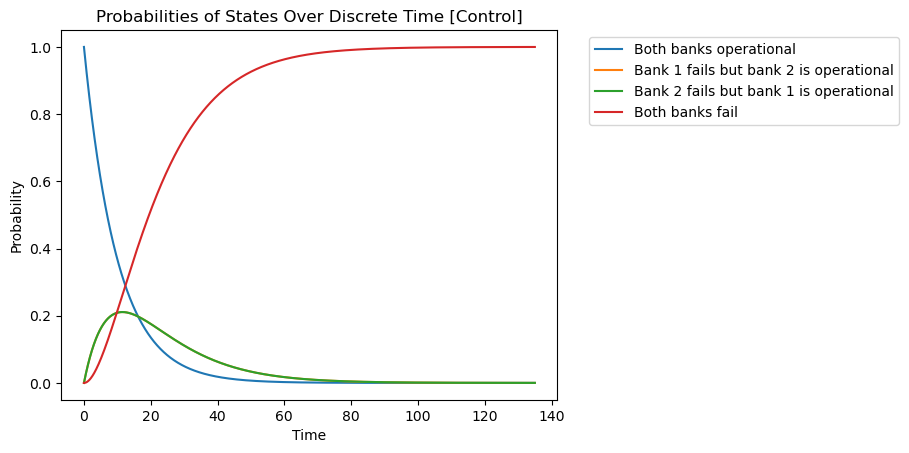

In [5]:
# Define the time points for plotting
t_discrete = np.arange(0, 27*5 + dt, dt)

# Plot the probabilities of being in each state over time
fig, ax = plt.subplots()
plt.plot(t_discrete, p0_values, label='Both banks operational')
plt.plot(t_discrete, p1_values, label='Bank 1 fails but bank 2 is operational')
plt.plot(t_discrete, p2_values, label='Bank 2 fails but bank 1 is operational')
plt.plot(t_discrete, p3_values, label='Both banks fail')
plt.xlabel('Time (Months)')
plt.ylabel('Probability')
plt.title('Probabilities of States Over Discrete Time [Control]')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [6]:
# Threshold for probability of failure, system failure
threshold = 0.99
time_to_fail = None

for t, p3 in zip(t_discrete, p3_values):
    if p3 >= threshold:
        time_to_fail = t
        break

# Display the expected time until most banks have failed
if time_to_fail is not None:
    print(f"Time until absorption: {time_to_fail}")
else:
    print("Both banks remain operational throughout the time period.")


Time until absorption: 78.4


# Federal Intervention

In [7]:
# Re-define the parameters of the model
a1 = 0.05
a2 = 0.05
w1 = 0.5
w2 = 0.5
B = 1.0

# Include new federal constraint
r1 = 0.05
r2 = 0.05

# Compute a12 and a21 based on the original parameters
a12 = (w1 + w2 / w1) ** B * a1
a21 = (w1 + w2 / w2) ** B * a2

# Define the new matrix including r 
# Define the matrix, three states corresponding to no bank failure, bank 1 failure, bank 2 failure
Q = np.array([[-a1 - a2, a1, a2, 0],
              [r1, -(a21 + r1), 0, a21],
              [r2, 0, -(a12 + r2), a12],
              [ 0,0,0,0]])

# Define the time step and total number of time steps
dt = 0.1
total_time_steps = int(27*5 / dt)

# Define the transition probability matrix 
P_mod = expm(Q * dt)

# Define the initial probability distribution of states, same as before
prob_dist = np.array([1, 0, 0, 0])

# Initialize lists to store the probabilities over time
p0_values_r = [prob_dist[0]]
p1_values_r = [prob_dist[1]]
p2_values_r = [prob_dist[2]]
p3_values_r = [prob_dist[3]]

# Iterate through the time steps
for i in range(total_time_steps):
    
    # Update the probability distribution of states
    prob_dist = np.dot(prob_dist, P_mod)
    
    # Check 
    if sum(prob_dist) > 1:
        # Renormalize 
        prob_dist /= sum(prob_dist)
        
    # Record the probabilities
    p0_values_r.append(prob_dist[0])
    p1_values_r.append(prob_dist[1])
    p2_values_r.append(prob_dist[2])
    p3_values_r.append(prob_dist[3])

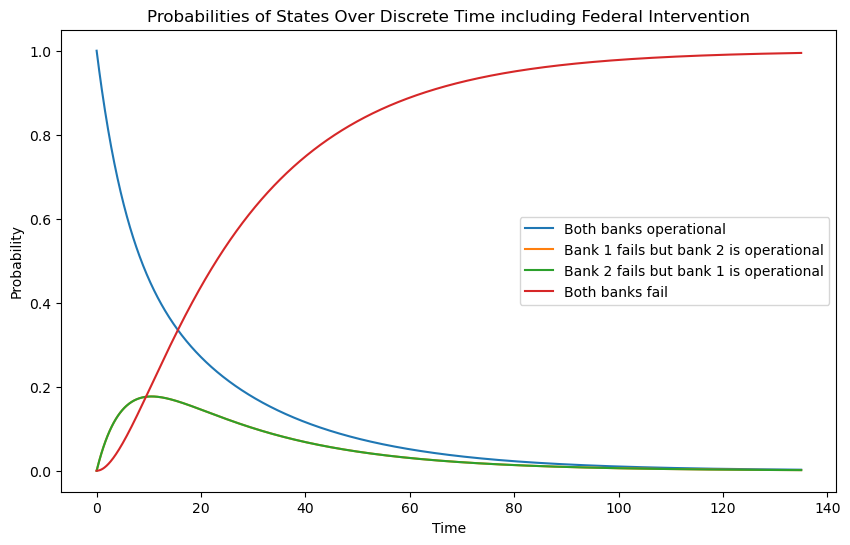

In [8]:
# Define the time points for the discrete-time Markov chain
t_discrete = np.arange(0, 27*5 + dt, dt)

# Plot the corrected probabilities over time
plt.figure(figsize=(10, 6))
plt.plot(t_discrete, p0_values_r, label='Both banks operational')
plt.plot(t_discrete, p1_values_r, label='Bank 1 fails but bank 2 is operational')
plt.plot(t_discrete, p2_values_r, label='Bank 2 fails but bank 1 is operational')
plt.plot(t_discrete, p3_values_r, label='Both banks fail')
plt.xlabel('Time (Months)')
plt.ylabel('Probability')
plt.title('Probabilities of States Over Discrete Time including Federal Intervention')
plt.legend()
plt.show()

In [9]:
# Find the time when the probability of being in state 0 falls below the threshold
threshold = 0.99
time_fail = None

for t, p3 in zip(t_discrete, p3_values_r):
    if p3 >= threshold:
        time_fail = t
        break
        
# Display the expected time until most banks have failed
if time_fail is not None:
    print(f"Expected time until absorption: {time_fail}")
else:
    print("Both banks operational")


Expected time until absorption: 119.30000000000001


# Heterogeneous Initial Volatility

In [10]:
# Define the parameters of the model
# a1,a2 are the independent failure rates of bank 1 and bank 2
a1 = 0.05
a2 = 0.10

# w1,w2 are the respective cash burdens of the bank in the ecosystem
w1 = 0.5
w2 = 0.5

# Macroeconomic/Contagion constant
B = 1.0

# Federal Bailout rate (none in control)
r1 = 0
r2 = 0

# Compute a12 and a21, the conditional failure of bank a given bank b failed

# Failure rate of bank 1 given bank 2 failed
a12 = (w1 + w2 / w1) ** B * a1

# Failure rate of bank 2 given bank 1 failed 
a21 = (w1 + w2 / w2) ** B * a2

# Define the Q matrix, four states corresponding to no bank failure, bank 1 failure, bank 2 failure, both banks fail
Q = np.array([[-a1 - a2, a1, a2, 0],
              [r1, -(a21 + r1), 0, a21],
              [r2, 0, -(a12 + r2), a12],
              [ 0,0,0,0]])

In [11]:
# Define the time step
dt = 0.1

# A bank cycle is 27 months, we are looking at 1 bank cycle
total_time_steps = int(27*5 / dt)

# Define the transition probability matrix using the matrix exponential 
P_t = expm(Q * dt)

# Define the initial probability distribution of states, using trivial initial condition
prob_dist = np.array([1, 0, 0, 0])

# Initialize lists to store the probabilities over time
p0_values = [prob_dist[0]]
p1_values = [prob_dist[1]]
p2_values = [prob_dist[2]]
p3_values = [prob_dist[3]]

# Iterate through the time steps
for i in range(total_time_steps):
    
    # Update the probability distribution of states according to P_t
    prob_dist = np.dot(prob_dist, P_t)
    
    # Check if the sum of the probabilities is greater than 1
    if sum(prob_dist) > 1:
        # Normalize probabilities to avoid numerical errors
        prob_dist /= sum(prob_dist)
        
    # Record the probabilities
    p0_values.append(prob_dist[0])
    p1_values.append(prob_dist[1])
    p2_values.append(prob_dist[2])
    p3_values.append(prob_dist[3])

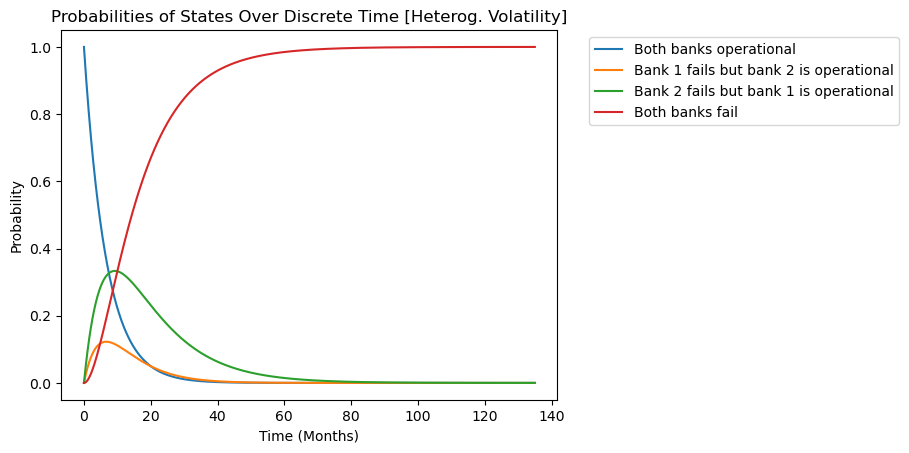

In [12]:
# Define the time points for plotting
t_discrete = np.arange(0, 27*5 + dt, dt)

# Plot the probabilities of being in each state over time
fig, ax = plt.subplots()
plt.plot(t_discrete, p0_values, label='Both banks operational')
plt.plot(t_discrete, p1_values, label='Bank 1 fails but bank 2 is operational')
plt.plot(t_discrete, p2_values, label='Bank 2 fails but bank 1 is operational')
plt.plot(t_discrete, p3_values, label='Both banks fail')
plt.xlabel('Time (Months)')
plt.ylabel('Probability')
plt.title('Probabilities of States Over Discrete Time [Heterog. Volatility]')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [13]:
# Threshold for probability of failure, system failure
threshold = 0.99
time_to_fail = None

for t, p3 in zip(t_discrete, p3_values):
    if p3 >= threshold:
        time_to_fail = t
        break

# Display the expected time until most banks have failed
if time_to_fail is not None:
    print(f"Time until absorption: {time_to_fail}")
else:
    print("Both banks remain operational throughout the time period.")


Time until absorption: 65.5


# Heterog. with differences in size of the banks

In [14]:
# Define the parameters of the model
# a1,a2 are the independent failure rates of bank 1 and bank 2
a1 = 0.05
a2 = 0.05

# w1,w2 are the respective cash burdens of the bank in the ecosystem
w1 = 0.33
w2 = 0.67

# Macroeconomic/Contagion constant
B = 1.0

# Federal Bailout rate (none in control)
r1 = 0
r2 = 0

# Compute a12 and a21, the conditional failure of bank a given bank b failed

# Failure rate of bank 1 given bank 2 failed
a12 = (w1 + w2 / w1) ** B * a1

# Failure rate of bank 2 given bank 1 failed 
a21 = (w1 + w2 / w2) ** B * a2

# Define the Q matrix, four states corresponding to no bank failure, bank 1 failure, bank 2 failure, both banks fail
Q = np.array([[-a1 - a2, a1, a2, 0],
              [r1, -(a21 + r1), 0, a21],
              [r2, 0, -(a12 + r2), a12],
              [ 0,0,0,0]])

In [15]:
# Define the time step
dt = 0.1

# A bank cycle is 27 months, we are looking at 1 bank cycle
total_time_steps = int(27*5 / dt)

# Define the transition probability matrix using the matrix exponential 
P_t = expm(Q * dt)

# Define the initial probability distribution of states, using trivial initial condition
prob_dist = np.array([1, 0, 0, 0])

# Initialize lists to store the probabilities over time
p0_values = [prob_dist[0]]
p1_values = [prob_dist[1]]
p2_values = [prob_dist[2]]
p3_values = [prob_dist[3]]

# Iterate through the time steps
for i in range(total_time_steps):
    
    # Update the probability distribution of states according to P_t
    prob_dist = np.dot(prob_dist, P_t)
    
    # Check if the sum of the probabilities is greater than 1
    if sum(prob_dist) > 1:
        # Normalize probabilities to avoid numerical errors
        prob_dist /= sum(prob_dist)
        
    # Record the probabilities
    p0_values.append(prob_dist[0])
    p1_values.append(prob_dist[1])
    p2_values.append(prob_dist[2])
    p3_values.append(prob_dist[3])

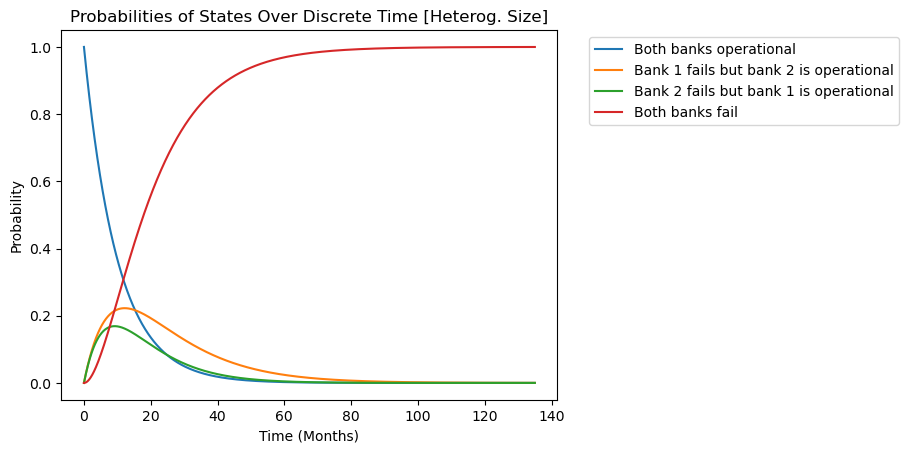

In [16]:
# Define the time points for plotting
t_discrete = np.arange(0, 27*5 + dt, dt)

# Plot the probabilities of being in each state over time
fig, ax = plt.subplots()
plt.plot(t_discrete, p0_values, label='Both banks operational')
plt.plot(t_discrete, p1_values, label='Bank 1 fails but bank 2 is operational')
plt.plot(t_discrete, p2_values, label='Bank 2 fails but bank 1 is operational')
plt.plot(t_discrete, p3_values, label='Both banks fail')
plt.xlabel('Time (Months)')
plt.ylabel('Probability')
plt.title('Probabilities of States Over Discrete Time [Heterog. Size]')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [17]:
# Threshold for probability of failure, system failure
threshold = 0.99
time_to_fail = None

for t, p3 in zip(t_discrete, p3_values):
    if p3 >= threshold:
        time_to_fail = t
        break

# Display the expected time until most banks have failed
if time_to_fail is not None:
    print(f"Time until absorption: {time_to_fail}")
else:
    print("Both banks remain operational throughout the time period.")


Time until absorption: 76.5


# Sensitivity Analysis

In [18]:
import random

# Simulation function used to change parameters of the model
def simulation(options):
    
    lst_b1timefail = []
    lst_b2timefail = []
    arr_p0vals = []
    arr_p1vals = []
    arr_p2vals = []
    arr_p3vals = []
    
    for i in options:
    # a1,a2 are the independent failure rates of bank 1 and bank 2
        a1 = i
        #a1 = 0.3
        a2 = 0.5

        # w1,w2 are the respective cash burdens of the bank in the ecosystem
        w1 = 0.5
        w2 = 0.5

        # Macroeconomic constant
        B = 1.8
        #B= i


        # Failure rate of bank 1 given bank 2 failed
        a12 = (w1 + w2 / w1) ** B * a1

        # Failure rate of bank 2 given bank 1 failed 
        a21 = (w1 + w2 / w2) ** B * a2

        r1 = 0
        r2 = 0
        # Define the matrix, three states corresponding to no bank failure, bank 1 failure, bank 2 failure
        Q = np.array([[-a1 - a2, a1, a2, 0],
              [r1, -(a21 + r1), 0, a21 ],
              [r2, 0, -(a12 + r2), a12],
              [ 0,0,0,0]])
    
        # Define the time step
        dt = 0.1

        total_time_steps = int(27*5 / dt)
    
        P_t = expm(Q * dt)

        prob_dist = np.array([1, 0, 0, 0])
    
        p0_values = [prob_dist[0]]
        p1_values = [prob_dist[1]]
        p2_values = [prob_dist[2]]
        p3_values = [prob_dist[3]]

        # Iterate through the time steps
        for i in range(total_time_steps):
            prob_dist = np.dot(prob_dist, P_t)
            if sum(prob_dist) > 1:
            # Renormalize the probabilities to sum to 1
                prob_dist /= sum(prob_dist)
    
            p0_values.append(prob_dist[0])
            p1_values.append(prob_dist[1])
            p2_values.append(prob_dist[2])
            p3_values.append(prob_dist[3])
            
        arr_p0vals.append(p0_values)
        arr_p1vals.append(p1_values)
        arr_p2vals.append(p2_values)
        arr_p3vals.append(p3_values)
        
        b1timefails = []
        b2timefails = []
        
        for k in range(1, 1000):
            b1timefail = 0
            b2timefail = 0
            for i in range(total_time_steps):
                samp = np.random.uniform(0.0, 1.0)
                if b1timefail != 0:
                    pass
                if b2timefail != 0:
                    pass
                if samp <= p1_values[i]:
                    b1timefail = i
                if samp <= p2_values[i]:
                    b2timefail = i
                if (b1timefail == 0) and (p1_values[i] < 0.02) and (i > 10):
                    b1timefail = i
                if (b2timefail == 0) and (p2_values[i] < 0.02) and (i > 10):
                    b2timefail = i
                    
            b1timefails.append(b1timefail)
            b2timefails.append(b2timefail)
                
        lst_b1timefail.append(np.mean(b1timefails))
        lst_b2timefail.append(np.mean(b2timefails))
        
    return(arr_p0vals, arr_p1vals, arr_p2vals, lst_b1timefail, lst_b2timefail, arr_p3vals)
               

## Alpha 1 Sensitivity Analysis

In [19]:
testa1 = np.arange(0.1,2,0.25)
a = simulation(testa1)

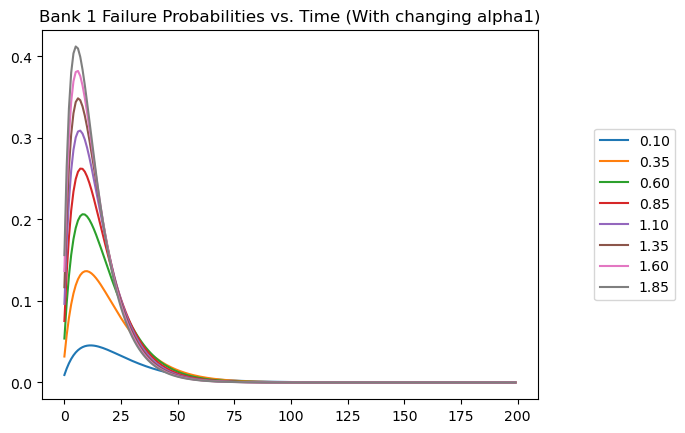

In [20]:
for i in range(len(a[1])):
    plt.plot(list(range(total_time_steps)[0:200]), a[1][i][1:][0:200], label = "{}".format(format(testa1[i],".2f")))
    
plt.title("Bank 1 Failure Probabilities vs. Time (With changing alpha1)");
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5));

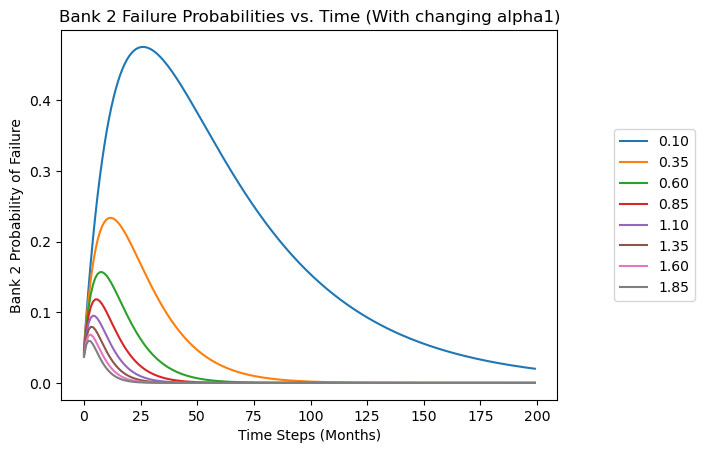

In [21]:
for i in range(len(a[2])):
    plt.plot(list(range(total_time_steps)[0:200]), a[2][i][1:][0:200], label = "{}".format(format(testa1[i],".2f")))
    
plt.title("Bank 2 Failure Probabilities vs. Time (With changing alpha1)");
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5));
plt.xlabel("Time Steps (Months)");
plt.ylabel("Bank 2 Probability of Failure");

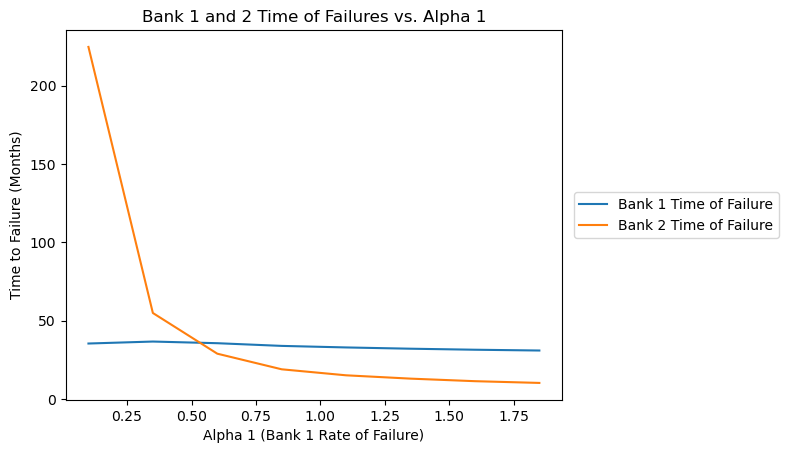

In [22]:
plt.plot(testa1, a[3], label = "Bank 1 Time of Failure")
plt.plot(testa1, a[4], label = "Bank 2 Time of Failure")

plt.title("Bank 1 and 2 Time of Failures vs. Alpha 1");
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5));
plt.ylabel("Time to Failure (Months)");
plt.xlabel("Alpha 1 (Bank 1 Rate of Failure)");

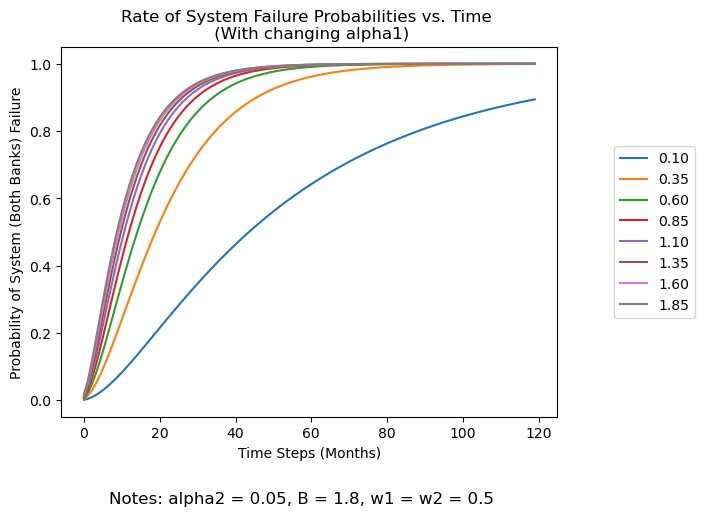

In [23]:
for i in range(len(a[2])):
    plt.plot(list(range(total_time_steps)[0:120]), a[5][i][1:][0:120], label = "{}".format(format(testa1[i],".2f")))
    
plt.title("Rate of System Failure Probabilities vs. Time \n (With changing alpha1)");
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5));
plt.xlabel("Time Steps (Months)");
plt.ylabel("Probability of System (Both Banks) Failure");
txt="Notes: alpha2 = 0.05, B = 1.8, w1 = w2 = 0.5"
plt.figtext(0.5, -0.07, txt, wrap=True, horizontalalignment='center', fontsize=12);

## Beta sensitivity analysis

In [24]:
import random

def simulation(options):
    
    lst_b1timefail = []
    lst_b2timefail = []
    arr_p0vals = []
    arr_p1vals = []
    arr_p2vals = []
    arr_p3vals = []
    
    for i in options:
    # a1,a2 are the independent failure rates of bank 1 and bank 2
        #a1 = i
        a1 = 0.2
        a2 = 0.02

        # w1,w2 are the respective cash burdens of the bank in the ecosystem
        w1 = 0.5
        w2 = 0.5

        # Macroeconomic constant
        #B = 1.8
        B= i


        # Failure rate of bank 1 given bank 2 failed
        a12 = (w1 + w2 / w1) ** B * a1

        # Failure rate of bank 2 given bank 1 failed 
        a21 = (w1 + w2 / w2) ** B * a2

        r1 = 0
        r2 = 0
        # Define the matrix, three states corresponding to no bank failure, bank 1 failure, bank 2 failure
        Q = np.array([[-a1 - a2, a1, a2, 0],
              [r1, -(a21 + r1), 0, a21 ],
              [r2, 0, -(a12 + r2), a12],
              [ 0,0,0,0]])
    
        # Define the time step
        dt = 0.1

        total_time_steps = int(27*5 / dt)
    
        P_t = expm(Q * dt)

        prob_dist = np.array([1, 0, 0, 0])
    
        p0_values = [prob_dist[0]]
        p1_values = [prob_dist[1]]
        p2_values = [prob_dist[2]]
        p3_values = [prob_dist[3]]

        # Iterate through the time steps
        for i in range(total_time_steps):
            prob_dist = np.dot(prob_dist, P_t)
            if sum(prob_dist) > 1:
            # Renormalize the probabilities to sum to 1
                prob_dist /= sum(prob_dist)
    
            p0_values.append(prob_dist[0])
            p1_values.append(prob_dist[1])
            p2_values.append(prob_dist[2])
            p3_values.append(prob_dist[3])
            
        arr_p0vals.append(p0_values)
        arr_p1vals.append(p1_values)
        arr_p2vals.append(p2_values)
        arr_p3vals.append(p3_values)
        
        b1timefails = []
        b2timefails = []
        
        for k in range(1, 1000):
            b1timefail = 0
            b2timefail = 0
            for i in range(total_time_steps):
                samp = np.random.uniform(0.0, 1.0)
                if b1timefail != 0:
                    pass
                if b2timefail != 0:
                    pass
                if samp <= p1_values[i]:
                    b1timefail = i
                if samp <= p2_values[i]:
                    b2timefail = i
                if (b1timefail == 0) and (p1_values[i] < 0.02) and (i > 10):
                    b1timefail = i
                if (b2timefail == 0) and (p2_values[i] < 0.02) and (i > 10):
                    b2timefail = i
                    
            b1timefails.append(b1timefail)
            b2timefails.append(b2timefail)
                
        lst_b1timefail.append(np.mean(b1timefails))
        lst_b2timefail.append(np.mean(b2timefails))
        
    return(arr_p0vals, arr_p1vals, arr_p2vals, lst_b1timefail, lst_b2timefail, arr_p3vals)
               

In [25]:
testb1 = np.arange(0,2,0.3)
b = simulation(testb1)

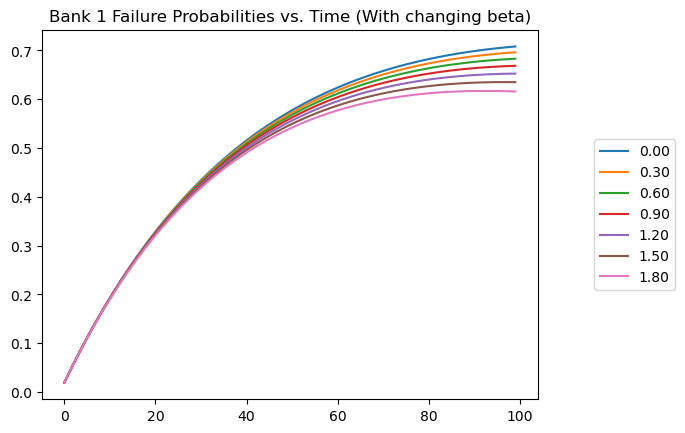

In [26]:
for i in range(len(b[1])):
    plt.plot(list(range(total_time_steps)[0:100]), b[1][i][1:][0:100], label = "{}".format(format(testb1[i],".2f")))
    
plt.title("Bank 1 Failure Probabilities vs. Time (With changing beta)");
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5));

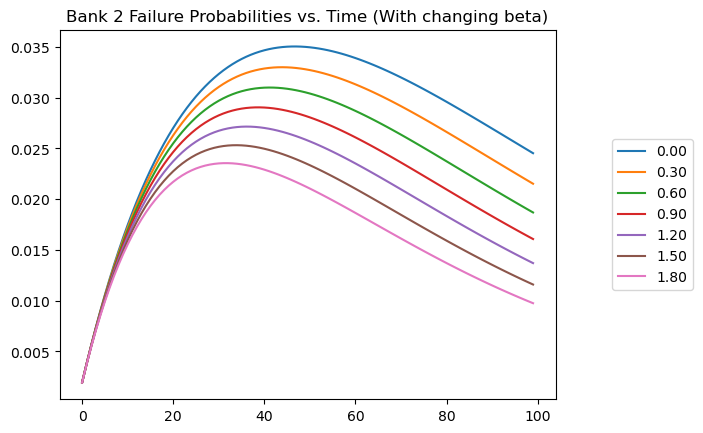

In [27]:
for i in range(len(b[2])):
    plt.plot(list(range(total_time_steps)[0:100]), b[2][i][1:][0:100], label = "{}".format(format(testb1[i],".2f")))
    
plt.title("Bank 2 Failure Probabilities vs. Time (With changing beta)");
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5));

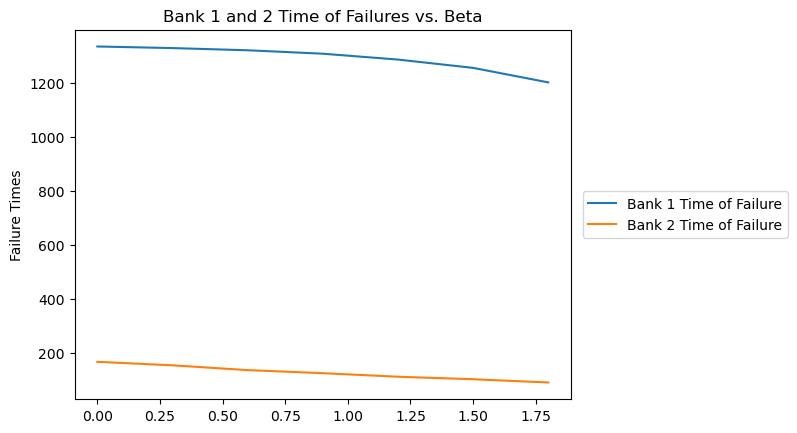

In [28]:
plt.plot(testb1, b[3], label = "Bank 1 Time of Failure")
plt.plot(testb1, b[4], label = "Bank 2 Time of Failure")

plt.title("Bank 1 and 2 Time of Failures vs. Beta");
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5));
plt.ylabel("Failure Times");

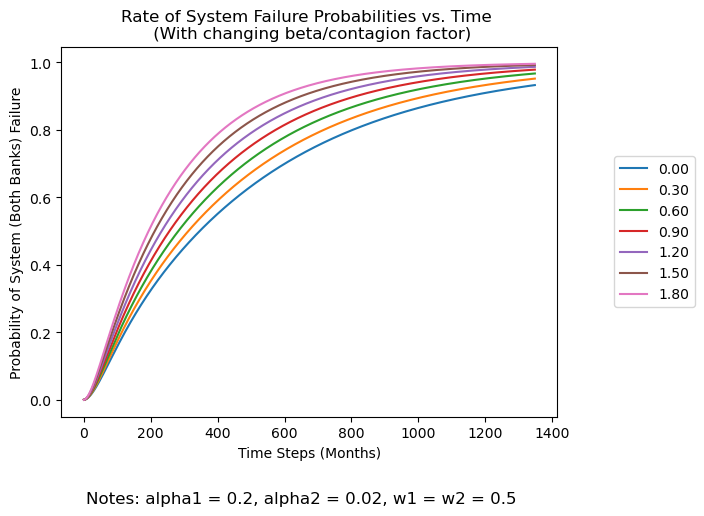

In [29]:
for i in range(len(b[2])):
    plt.plot(list(range(total_time_steps)), b[5][i][1:], label = "{}".format(format(testb1[i],".2f")))
    
plt.title("Rate of System Failure Probabilities vs. Time \n (With changing beta/contagion factor)");
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5));
plt.xlabel("Time Steps (Months)");
plt.ylabel("Probability of System (Both Banks) Failure");
txt="Notes: alpha1 = 0.2, alpha2 = 0.02, w1 = w2 = 0.5"
plt.figtext(0.5, -0.07, txt, wrap=True, horizontalalignment='center', fontsize=12);

## Reserves sensitivity analysis

In [30]:
import random

def simulation(options):
    
    lst_b1timefail = []
    lst_b2timefail = []
    arr_p0vals = []
    arr_p1vals = []
    arr_p2vals = []
    arr_p3vals = []
    
    for i in options:
    # a1,a2 are the independent failure rates of bank 1 and bank 2
        #a1 = i
        a1 = 0.2
        a2 = 0.02

        # w1,w2 are the respective cash burdens of the bank in the ecosystem
        w1 = i
        w2 = 1-i

        # Macroeconomic constant
        B = 1.8
        #B= i


        # Failure rate of bank 1 given bank 2 failed
        a12 = (w1 + w2 / w1) ** B * a1

        # Failure rate of bank 2 given bank 1 failed 
        a21 = (w1 + w2 / w2) ** B * a2

        r1 = 0
        r2 = 0
        # Define the matrix, three states corresponding to no bank failure, bank 1 failure, bank 2 failure
        Q = np.array([[-a1 - a2, a1, a2, 0],
              [r1, -(a21 + r1), 0, a21 ],
              [r2, 0, -(a12 + r2), a12],
              [ 0,0,0,0]])
        #print(Q)
        # Define the time step
        dt = 0.1

        total_time_steps = int(27*5 / dt)
    
        P_t = expm(Q * dt)

        prob_dist = np.array([1, 0, 0, 0])
    
        p0_values = [prob_dist[0]]
        p1_values = [prob_dist[1]]
        p2_values = [prob_dist[2]]
        p3_values = [prob_dist[3]]

        # Iterate through the time steps
        for i in range(total_time_steps):
            prob_dist = np.dot(prob_dist, P_t)
            if sum(prob_dist) > 1:
            # Renormalize the probabilities to sum to 1
                prob_dist /= sum(prob_dist)
    
            p0_values.append(prob_dist[0])
            p1_values.append(prob_dist[1])
            p2_values.append(prob_dist[2])
            p3_values.append(prob_dist[3])
            
        arr_p0vals.append(p0_values)
        arr_p1vals.append(p1_values)
        arr_p2vals.append(p2_values)
        arr_p3vals.append(p3_values)
        
        b1timefails = []
        b2timefails = []
        
        for k in range(1, 1000):
            b1timefail = 0
            b2timefail = 0
            for i in range(total_time_steps):
                samp = np.random.uniform(0.0, 1.0)
                if b1timefail != 0:
                    pass
                if b2timefail != 0:
                    pass
                if samp <= p1_values[i]:
                    b1timefail = i
                if samp <= p2_values[i]:
                    b2timefail = i
                if (b1timefail == 0) and (p1_values[i] < 0.02):
                    b1timefail = i
                if (b2timefail == 0) and (p2_values[i] < 0.02):
                    b2timefail = i
                    
            b1timefails.append(b1timefail)
            b2timefails.append(b2timefail)
                
        lst_b1timefail.append(np.mean(b1timefails))
        lst_b2timefail.append(np.mean(b2timefails))
        
    return(arr_p0vals, arr_p1vals, arr_p2vals, lst_b1timefail, lst_b2timefail, arr_p3vals)
               

In [31]:
testw1 = np.arange(0.1,1,0.1)
w = simulation(testw1)

Text(0.5, 0, 'W1 Holding Reserve Percentage')

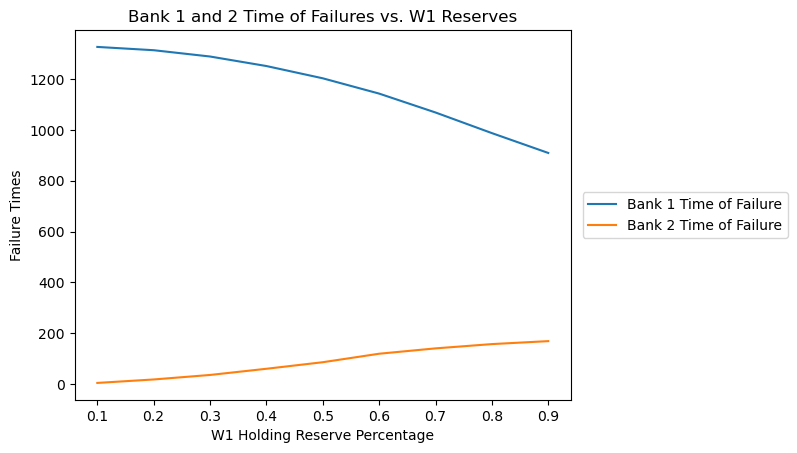

In [32]:
plt.plot(testw1, w[3], label = "Bank 1 Time of Failure")
plt.plot(testw1, w[4], label = "Bank 2 Time of Failure")

plt.title("Bank 1 and 2 Time of Failures vs. W1 Reserves");
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5));
plt.ylabel("Failure Times");
plt.xlabel("W1 Holding Reserve Percentage")

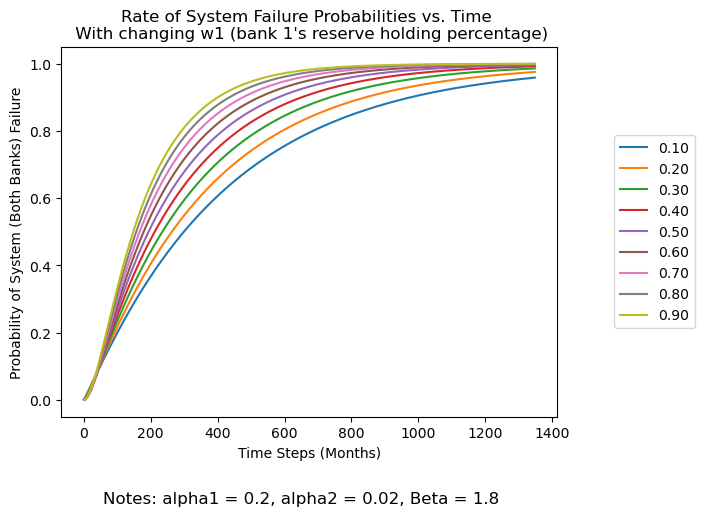

In [33]:
for i in range(len(w[2])):
    plt.plot(list(range(total_time_steps)), w[5][i][1:], label = "{}".format(format(testw1[i],".2f")))
    
plt.title("Rate of System Failure Probabilities vs. Time \n With changing w1 (bank 1's reserve holding percentage)");
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5));
plt.xlabel("Time Steps (Months)");
plt.ylabel("Probability of System (Both Banks) Failure");
txt="Notes: alpha1 = 0.2, alpha2 = 0.02, Beta = 1.8"
plt.figtext(0.5, -0.07, txt, wrap=True, horizontalalignment='center', fontsize=12);